# VOICE SYNTHESIZER WITH CUSTOM VOICE TTS (CODING)

In [ ]:
# Cloning the repository
!git clone https://github.com/misbah4064/Real-Time-Voice-Cloning.git

Cloning into 'Real-Time-Voice-Cloning'...
remote: Enumerating objects: 2453, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 2453 (delta 0), reused 2 (delta 0), pack-reused 2450
Receiving objects: 100% (2453/2453), 363.73 MiB | 32.97 MiB/s, done.
Resolving deltas: 100% (1353/1353), done.


In [ ]:
# Changing the current directory to the repository's directory
%cd Real-Time-Voice-Cloning/

/content/Real-Time-Voice-Cloning


In [ ]:
# Installing the dependencies
!pip install -q -r requirements.txt
!apt-get install -qq libportaudio2

     |████████████████████████████████| 109.3 MB 18 kB/s 
     |████████████████████████████████| 80 kB 8.3 MB/s 
     |████████████████████████████████| 676 kB 42.8 MB/s 
     |████████████████████████████████| 235 kB 40.2 MB/s 
     |████████████████████████████████| 8.3 MB 23.4 MB/s 
     |████████████████████████████████| 3.5 MB 38.1 MB/s 
     |████████████████████████████████| 50 kB 5.7 MB/s 
     |████████████████████████████████| 488 kB 47.9 MB/s 
     |████████████████████████████████| 3.1 MB 35.9 MB/s 
     |████████████████████████████████| 20.2 MB 1.4 MB/s 
     |████████████████████████████████| 81 kB 8.9 MB/s 
     |████████████████████████████████| 69 kB 6.5 MB/s 
     |████████████████████████████████| 52 kB 1.1 MB/s 
     |████████████████████████████████| 59.9 MB 77 kB/s 
     |████████████████████████████████| 317 kB 61.7 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of th

In [ ]:
# Downloading pretrained data and unzipping it
!gdown https://drive.google.com/uc?id=1n1sPXvT34yXFLT47QZA6FIRGrwMeSsZc
!unzip pretrained.zip

Downloading...
From: https://drive.google.com/uc?id=1n1sPXvT34yXFLT47QZA6FIRGrwMeSsZc
To: /content/Real-Time-Voice-Cloning/pretrained.zip
100% 384M/384M [00:03<00:00, 119MB/s] 
Archive:  pretrained.zip
   creating: encoder/saved_models/
  inflating: encoder/saved_models/pretrained.pt  
   creating: synthesizer/saved_models/
   creating: synthesizer/saved_models/logs-pretrained/
   creating: synthesizer/saved_models/logs-pretrained/taco_pretrained/
 extracting: synthesizer/saved_models/logs-pretrained/taco_pretrained/checkpoint  
  inflating: synthesizer/saved_models/logs-pretrained/taco_pretrained/tacotron_model.ckpt-278000.data-00000-of-00001  
  inflating: synthesizer/saved_models/logs-pretrained/taco_pretrained/tacotron_model.ckpt-278000.index  
  inflating: synthesizer/saved_models/logs-pretrained/taco_pretrained/tacotron_model.ckpt-278000.meta  
   creating: vocoder/saved_models/
   creating: vocoder/saved_models/pretrained/
  inflating: vocoder/saved_models/pretrained/pretrained.

In [ ]:
# Initializing all the encoder libraries
from IPython.display import Audio
from IPython.utils import io
from synthesizer.inference import Synthesizer
from encoder import inference as encoder
from vocoder import inference as vocoder
from pathlib import Path
import numpy as np
import librosa
encoder_weights = Path("encoder/saved_models/pretrained.pt")
vocoder_weights = Path("vocoder/saved_models/pretrained/pretrained.pt")
syn_dir = Path("synthesizer/saved_models/logs-pretrained/taco_pretrained")
encoder.load_model(encoder_weights)
synthesizer = Synthesizer(syn_dir)
vocoder.load_model(vocoder_weights)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

Loaded encoder "pretrained.pt" trained to step 1564501
Found synthesizer "pretrained" trained to step 278000
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at vocoder/saved_models/pretrained/pretrained.pt


In [ ]:
def synth(text,embed):
  # in_fpath = Path("trump10.wav")
  # reprocessed_wav = encoder.preprocess_wav(in_fpath)
  # original_wav, sampling_rate = librosa.load(in_fpath)
  # preprocessed_wav = encoder.preprocess_wav(original_wav, sampling_rate)
  # embed = encoder.embed_utterance(preprocessed_wav)
  with io.capture_output() as captured:
    specs = synthesizer.synthesize_spectrograms([text], [embed])
  generated_wav = vocoder.infer_waveform(specs[0])
  # generated_wav = np.pad(generated_wav, (0, synthesizer.sample_rate), mode="constant")
  return generated_wav
  # generated_wav = np.pad(generated_wav, (0, synthesizer.sample_rate), mode="constant")
  # display(Audio(generated_wav, rate=synthesizer.sample_rate))

# TRUMMP VOICE MODEL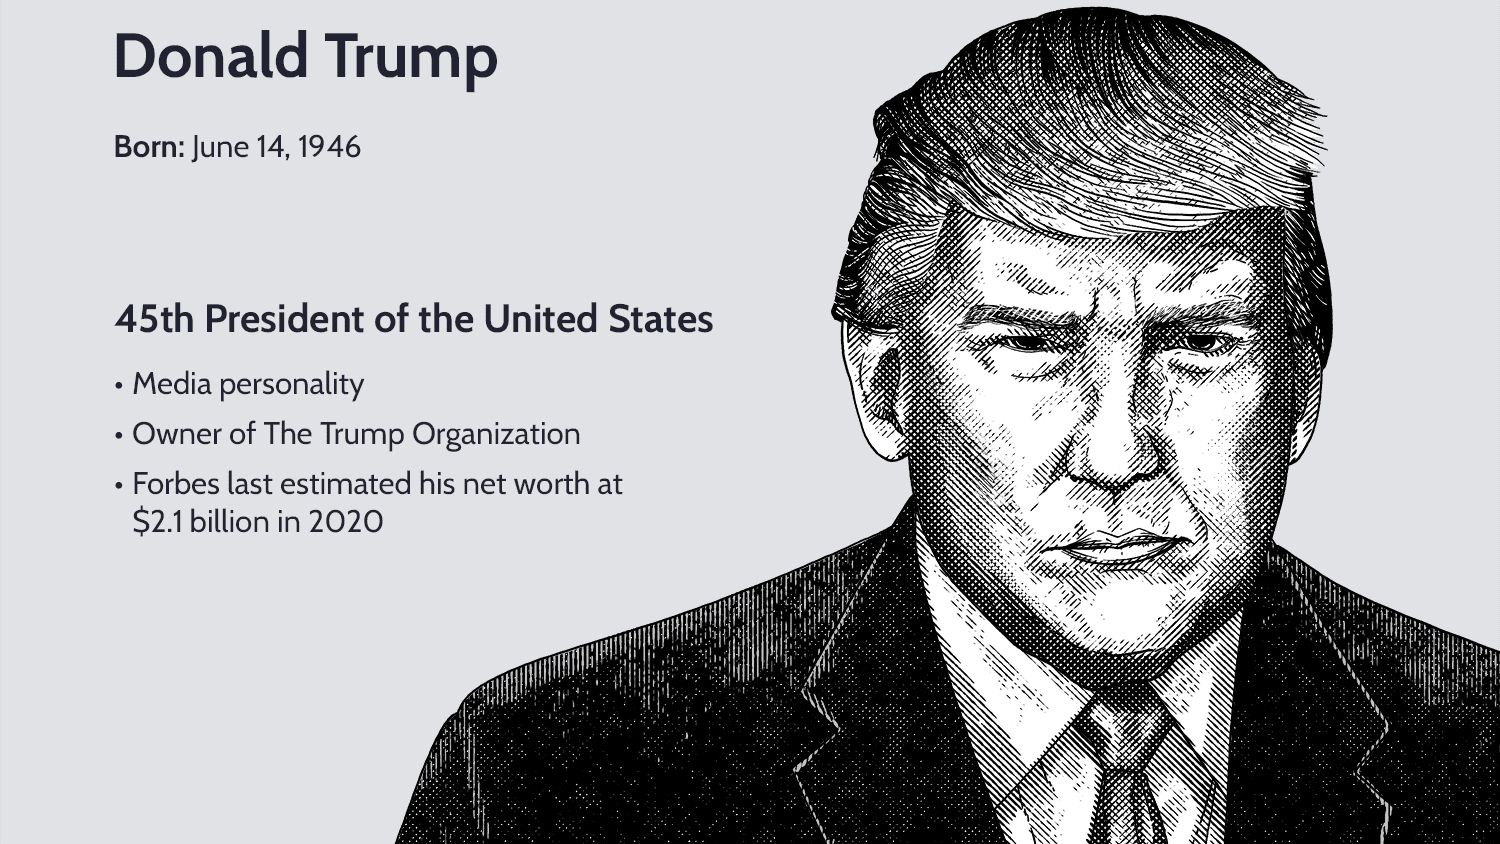

In [ ]:
paragraph = "Success consists of going from failure to failure without loss of enthusiasm"

In [ ]:
#@title VOICE 1  { vertical-output: true }
# sentences = paragraph.split(", ")
# for text in sentences:
#   print(text)
import re
import scipy
sentences = re.split('; |, |\. |\n',paragraph)
# sentences = paragraph.split(" ")
in_fpath = Path("trump11.wav")
reprocessed_wav = encoder.preprocess_wav(in_fpath)
original_wav, sampling_rate = librosa.load(in_fpath)
preprocessed_wav = encoder.preprocess_wav(original_wav, sampling_rate)
embed = encoder.embed_utterance(preprocessed_wav)
generated_audio = None
for sent in sentences:
  print(sent)
  audio = synth(sent,embed)
  display(Audio(audio, rate=synthesizer.sample_rate))
  if generated_audio is None:
    generated_audio = audio
  else:
    generated_audio = np.append(generated_audio,audio)
    # generated_audio = np.pad(generated_audio, (0, audio), mode="constant")
    # generated_audio = generated_audio + audio
display(Audio(generated_audio, rate=synthesizer.sample_rate))

  

Success consists of going from failure to failure without loss of enthusiasm
{| ████████████████ 76000/76800 | Batch Size: 8 | Gen Rate: 2.0kHz | }

# DR. APJ VOICE MODEL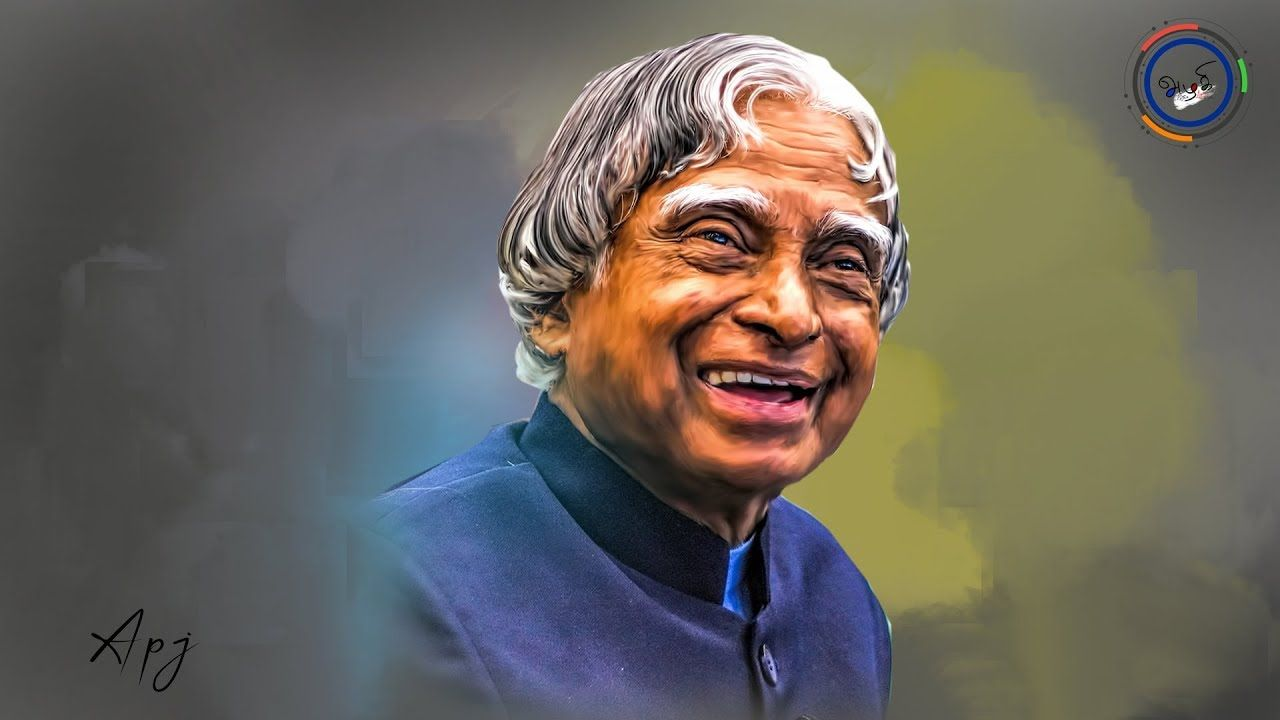

In [ ]:
paragraph = "Success consists of going from failure to failure without loss of enthusiasm"

In [ ]:
#@title VOICE 2 { vertical-output: true }
# sentences = paragraph.split(", ")
# for text in sentences:
#   print(text)
import re
import scipy
sentences = re.split('; |, |\. |\n',paragraph)
# sentences = paragraph.split(" ")
in_fpath = Path("APJ.wav")
reprocessed_wav = encoder.preprocess_wav(in_fpath)
original_wav, sampling_rate = librosa.load(in_fpath)
preprocessed_wav = encoder.preprocess_wav(original_wav, sampling_rate)
embed = encoder.embed_utterance(preprocessed_wav)
generated_audio = None
for sent in sentences:
  print(sent)
  audio = synth(sent,embed)
  display(Audio(audio, rate=synthesizer.sample_rate))
  if generated_audio is None:
    generated_audio = audio
  else:
    generated_audio = np.append(generated_audio,audio)
    # generated_audio = np.pad(generated_audio, (0, audio), mode="constant")
    # generated_audio = generated_audio + audio
display(Audio(generated_audio, rate=synthesizer.sample_rate))

  

Success consists of going from failure to failure without loss of enthusiasm
{| ████████████████ 76000/76800 | Batch Size: 8 | Gen Rate: 2.1kHz | }

# HEMAND VOICE MODEL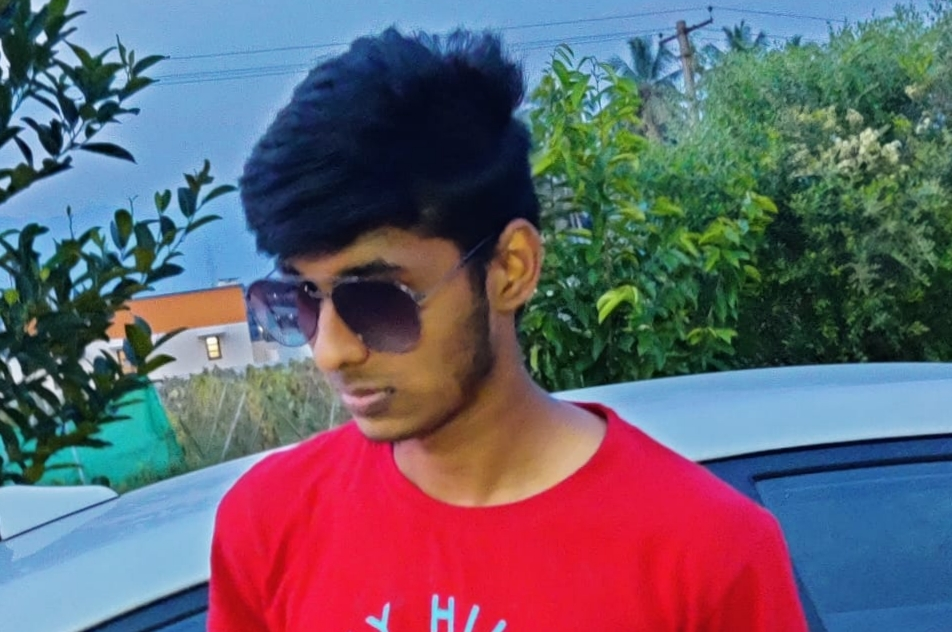

In [ ]:
paragraph = "Success consists of going from failure to failure without loss of enthusiasm"

In [ ]:
#@title VOICE 3 { vertical-output: true }
# sentences = paragraph.split(", ")
# for text in sentences:
#   print(text)
import re
import scipy
sentences = re.split('; |, |\. |\n',paragraph)
# sentences = paragraph.split(" ")
in_fpath = Path("hemand.wav")
reprocessed_wav = encoder.preprocess_wav(in_fpath)
original_wav, sampling_rate = librosa.load(in_fpath)
preprocessed_wav = encoder.preprocess_wav(original_wav, sampling_rate)
embed = encoder.embed_utterance(preprocessed_wav)
generated_audio = None
for sent in sentences:
  print(sent)
  audio = synth(sent,embed)
  display(Audio(audio, rate=synthesizer.sample_rate))
  if generated_audio is None:
    generated_audio = audio
  else:
    generated_audio = np.append(generated_audio,audio)
    # generated_audio = np.pad(generated_audio, (0, audio), mode="constant")
    # generated_audio = generated_audio + audio
display(Audio(generated_audio, rate=synthesizer.sample_rate))

  

Success consists of going from failure to failure without loss of enthusiasm
{| ████████████████ 76000/76800 | Batch Size: 8 | Gen Rate: 2.1kHz | }

# ASHIK VOICE MODEL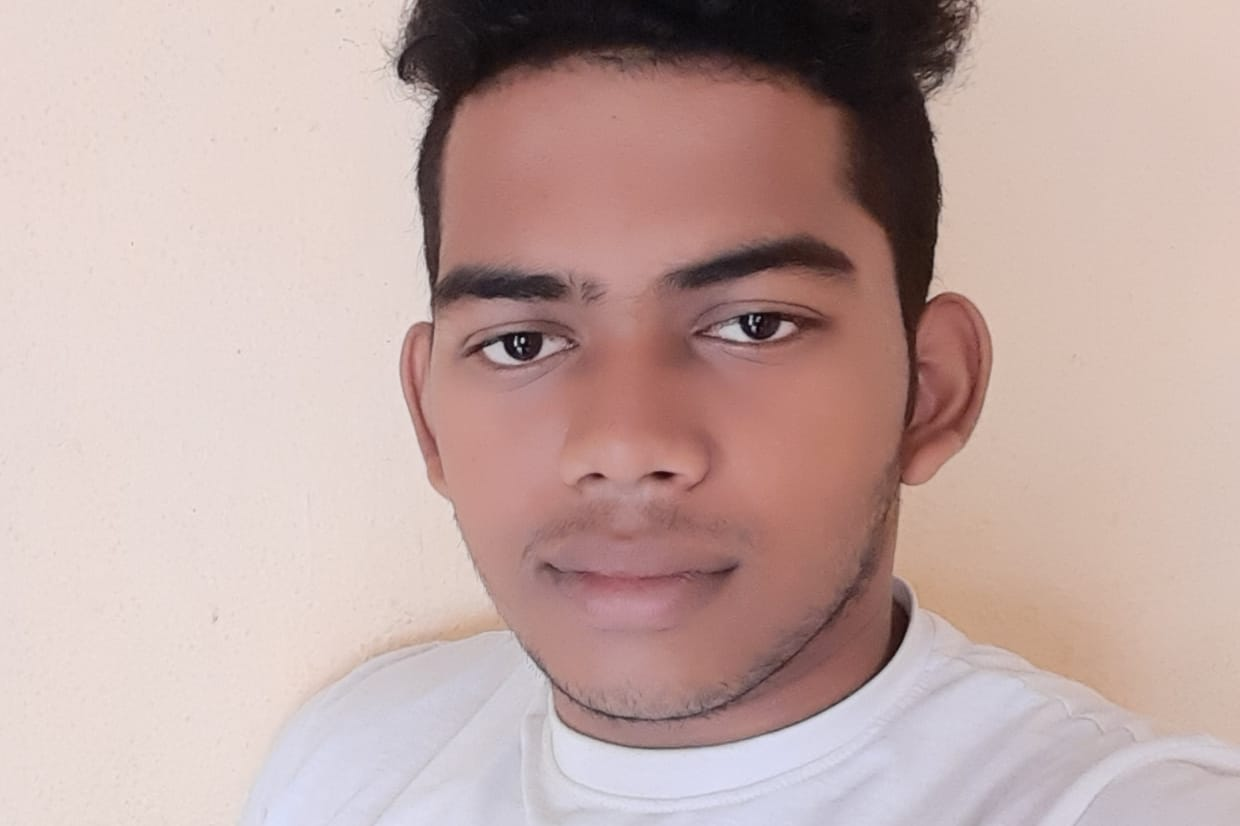

In [ ]:
paragraph = "Success consists of going from failure to failure without loss of enthusiasm"

In [ ]:
#@title VOICE 4 { vertical-output: true }
# sentences = paragraph.split(", ")
# for text in sentences:
#   print(text)
import re
import scipy
sentences = re.split('; |, |\. |\n',paragraph)
# sentences = paragraph.split(" ")
in_fpath = Path("ashik.wav")
reprocessed_wav = encoder.preprocess_wav(in_fpath)
original_wav, sampling_rate = librosa.load(in_fpath)
preprocessed_wav = encoder.preprocess_wav(original_wav, sampling_rate)
embed = encoder.embed_utterance(preprocessed_wav)
generated_audio = None
for sent in sentences:
  print(sent)
  audio = synth(sent,embed)
  display(Audio(audio, rate=synthesizer.sample_rate))
  if generated_audio is None:
    generated_audio = audio
  else:
    generated_audio = np.append(generated_audio,audio)
    # generated_audio = np.pad(generated_audio, (0, audio), mode="constant")
    # generated_audio = generated_audio + audio
display(Audio(generated_audio, rate=synthesizer.sample_rate))

  

Success consists of going from failure to failure without loss of enthusiasm
{| ████████████████ 76000/76800 | Batch Size: 8 | Gen Rate: 2.1kHz | }

In [ ]:
import os
from google.colab import drive
MOUNTPOINT = '/content/gdrive'
DATADIR = os.path.join(MOUNTPOINT, 'My Drive', 'Colab Notebooks')
drive.mount(MOUNTPOINT)

Mounted at /content/gdrive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
